In [1]:
import h5py
import o2sclpy
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

In [2]:
eos_params = ['a','alpha','param_S','param_L','csq1','trans1','csq2','trans2','csq3']
R_list = [f"R_{i}" for i in range(100)]

In [3]:
o2scl_settings=o2sclpy.lib_settings_class()
hf=o2sclpy.hdf_file()
print('PyModule : Reading test file: ')
hf.open('aff_inv/ml_all') # Required to be passed
tab=o2sclpy.table()
name=b''
o2sclpy.hdf_input_table(hf,tab,name)
hf.close()

PyModule : Reading test file: 


In [4]:
def read_tab(tab,list):
  X=[]
  for i in list:
    X.append(tab[i][0:tab.get_nlines()])
  X = np.asarray(X).transpose()
  return X

In [5]:
input = read_tab(tab,eos_params)
output = read_tab(tab,R_list)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [7]:
emu_dtr=o2sclpy.interpm_sklearn_dtr()
emu_dtr.set_data(X_train,y_train)

In [8]:
y_pred=emu_dtr.eval(X_test[0])
print(y_pred,y_test[0])

[[18.0745628  16.49395542 15.47261521 14.7702745  14.25914137 13.86687842
  13.56541263 13.32149641 13.12590819 12.96556636 12.8311189  12.71736487
  12.62021407 12.53644149 12.46369405 12.40060898 12.34954011 12.30930303
  12.27584467 12.25044204 12.23237397 12.21720039 12.20995397 12.20339547
  12.20314918 12.20290436 12.20769223 12.2124801  12.22035973 12.22883368
  12.23876728 12.24979599 12.26116632 12.27378747 12.28640862 12.2996448
  12.3130478  12.32647783 12.33996871 12.35345959 12.36654213 12.37952137
  12.39220636 12.40413519 12.41606402 12.4267918  12.43717187 12.44693133
  12.45528277 12.46363421 12.46973807 12.47557117 12.47979081 12.48271748
  12.48490955 12.48533927 12.48562641 12.4836749  12.48172339 12.47752009
  12.47296523 12.4662282  12.45868451 12.44877622 12.4377304  12.42369689
  12.40849213 12.38891519 12.36774436 12.34149188 12.31088916 12.27574637
  12.23274371 12.17929415 12.11255553 12.02508915 11.88656131  0.
   0.          0.          0.          0.      

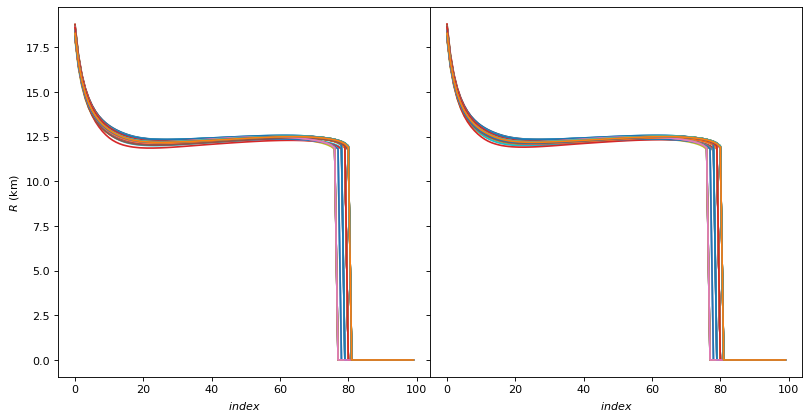

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,figsize=(12, 6),dpi=80,gridspec_kw={'hspace': 0, 'wspace': 0})
axes.flatten()
axes[0].set_ylabel(r"$R~(\mathrm{km})$")
axes[0].set_xlabel(r"$index$")
axes[1].set_xlabel(r"$index$")
for i in range(0,len(y_test)):
  axes[0].plot(y_test[i])
  axes[1].plot(emu_dtr.eval(X_test[i])[0])

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model=DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1,verbose = 2, scoring='neg_mean_squared_error',return_train_score=True)
# Fit the model
grid_search.fit(X_train, y_train)
# Get best regressor
best_regressor = grid_search.best_estimator_


Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s

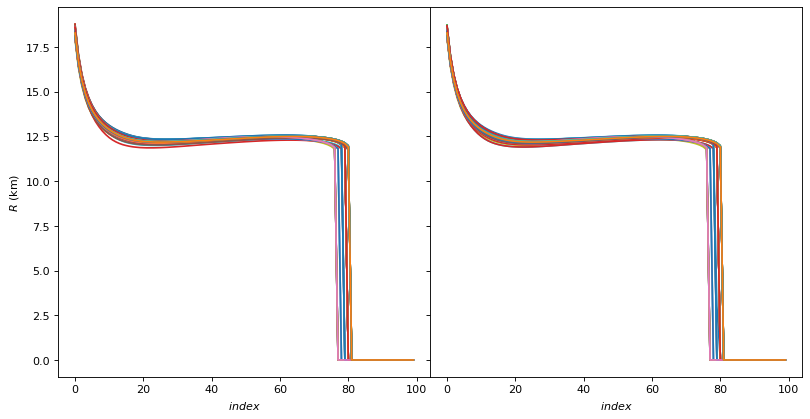

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,figsize=(12, 6),dpi=80,gridspec_kw={'hspace': 0, 'wspace': 0})
axes.flatten()
axes[0].set_ylabel(r"$R~(\mathrm{km})$")
axes[0].set_xlabel(r"$index$")
axes[1].set_xlabel(r"$index$")
for i in range(0,len(y_test)):
  axes[0].plot(y_test[i])
  axes[1].plot(best_regressor.predict([X_test[i]])[0])

In [13]:
best_regressor.predict([X_test[i]])[0]

array([18.07898294, 16.49741913, 15.47511157, 14.77224732, 14.26065134,
       13.86804956, 13.56628789, 13.32211755, 13.12636885, 12.96584479,
       12.83124137, 12.71734846, 12.62007682, 12.53619723, 12.4633641 ,
       12.40023327, 12.34907489, 12.30884884, 12.27540284, 12.24995326,
       12.23190365, 12.21670042, 12.20947419, 12.20292744, 12.2026652 ,
       12.20244159, 12.20720557, 12.21198045, 12.2198717 , 12.22833894,
       12.23827964, 12.24930226, 12.26067571, 12.27329441, 12.28591311,
       12.29915107, 12.31255171, 12.3259807 , 12.33947187, 12.35296305,
       12.36604308, 12.37902246, 12.39170261, 12.40363342, 12.41556424,
       12.4262856 , 12.43666726, 12.44641764, 12.45477018, 12.46312271,
       12.4692171 , 12.47505393, 12.47926272, 12.48219329, 12.48437787,
       12.48481425, 12.48509688, 12.48315316, 12.48120944, 12.47700074,
       12.47245211, 12.46571051, 12.45817613, 12.44826222, 12.43722537,
       12.42318346, 12.40798683, 12.38840211, 12.36722054, 12.34

In [16]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
bes